In [1]:
#Importer les packages python

import matplotlib
import pandas as pd
import numpy as np
import descartes
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.options.mode.chained_assignment = None

In [2]:
df_list = pd.read_csv('listings.csv')
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201214191425,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20201214191425,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4890,https://www.airbnb.com/rooms/4890,20201214191425,2020-12-16,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,...,10.0,10.0,10.0,NaN,f,14,14,0,0,0.21
3,5396,https://www.airbnb.com/rooms/5396,20201214191425,2020-12-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,...,10.0,10.0,8.0,7510402838018,f,1,1,0,0,1.65
4,7397,https://www.airbnb.com/rooms/7397,20201214191425,2020-12-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,...,10.0,10.0,10.0,7510400829623,f,3,3,0,0,2.28


In [3]:
#df_list.columns

In [4]:
df_list = df_list.drop(['listing_url', 'scrape_id',
       'picture_url', 'host_id', 'has_availability', 'reviews_per_month',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_url',
       'host_total_listings_count', 'host_verifications', 'bathrooms_text',
       'host_has_profile_pic', 'host_identity_verified', 'description',
       'minimum_minimum_nights', 'bathrooms', 'amenities',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'neighbourhood_group_cleansed',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count', 'calendar_updated',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'], axis= 1)

In [5]:
#df_list.info()

In [6]:
#Vérifier le taux des données manquantes dans la base brutes
#df_list.isnull().sum()/len(df_list)*100

In [7]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65917 entries, 0 to 65916
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      65917 non-null  int64  
 1   last_scraped            65917 non-null  object 
 2   name                    65853 non-null  object 
 3   neighborhood_overview   39651 non-null  object 
 4   neighbourhood           39651 non-null  object 
 5   neighbourhood_cleansed  65917 non-null  object 
 6   latitude                65917 non-null  float64
 7   longitude               65917 non-null  float64
 8   property_type           65917 non-null  object 
 9   room_type               65917 non-null  object 
 10  accommodates            65917 non-null  int64  
 11  bedrooms                52325 non-null  float64
 12  beds                    65317 non-null  float64
 13  price                   65917 non-null  object 
 14  minimum_nights          65917 non-null

In [8]:
df_list['neighbourhood'].unique()

array([nan, 'Paris, Île-de-France, France',
       'Paris, Ile-de-France, France',
       'Paris 11e Arrondissement, Île-de-France, France',
       'Paris, IDF, France', 'Paris, France', 'Paris, IdF, France',
       'Paris-13E-Arrondissement, Île-de-France, France',
       'Levallois-Perret, Île-de-France, France', 'Paris 5e, France',
       'Paris 4e arrondissement, Île-de-France, France',
       'Paris, Ile de France, France', 'Paris , Ile-de-France, France',
       'Paris 18e, France', 'Paris, Pigalle, France',
       'Paris, le marais, France', 'Paris 1e, France',
       'Boulogne-Billancourt, Île-de-France, France',
       'PARIS, Île-de-France, France', 'Paris, Paris province, France',
       'Paris, Ã\x8ele-de-France, France', 'Paris 2e, France',
       'Paris 11e arrondissement, Île-de-France, France',
       'Le Kremlin-Bicêtre, Île-de-France, France',
       'Paris , île de France, France', 'Paris, ile de france, France',
       'Paris, France, France',
       'NEUILLY SUR SE

In [9]:
df_list['neighbourhood'].nunique()

250

In [10]:
df_list['neighbourhood'].value_counts()

Paris, Île-de-France, France                       36352
Paris, France                                        989
Paris, IDF, France                                   438
Paris, Île-de-France Region, France                  212
Paris, Ile-de-France, France                          79
                                                   ...  
Paris 10e, Île-de-France, France                       1
Paris-12E-Arrondissement, IDF, France                  1
Bagnolet, France, France                               1
Paris 11e arrondissement, Île-de-France, France        1
Paris 07 Palais-Bourbon, France                        1
Name: neighbourhood, Length: 250, dtype: int64

In [11]:
paris = ['Paris, Île-de-France, France',
       'Paris, Ile-de-France, France',
       'Paris 11e Arrondissement, Île-de-France, France',
       'Paris, IDF, France', 'Paris, France', 'Paris, IdF, France',
       'Paris-13E-Arrondissement, Île-de-France, France',
       'Paris 5e, France',
       'Paris 4e arrondissement, Île-de-France, France',
       'Paris, Ile de France, France', 'Paris , Ile-de-France, France',
       'Paris 18e, France', 'Paris, Pigalle, France',
       'Paris, le marais, France', 'Paris 1e, France',
       'PARIS, Île-de-France, France', 'Paris, Paris province, France',
       'Paris, Ã\x8ele-de-France, France', 'Paris 2e, France',
       'Paris 11e arrondissement, Île-de-France, France',
       'Paris , île de France, France', 'Paris, ile de france, France',
       'Paris, France, France',
       'PARIS 3eme, Île-de-France, France',
       'Paris 1e, Île-de-France, France',
       'Paris-19E-Arrondissement, Île-de-France, France',
       'París, Île-de-France, France', 'France',
       'PARIS 02, Île-de-France, France',
       'Paris-10E-Arrondissement, Île-de-France, France',
       'Paris 09e, Île-de-France, France', 'Paris 10e, France',
       'Paris 6e arrondissement, Île-de-France, France',
       'Charenton Le Pont - limitrophe avec paris , Île-de-France, France',
       'Paris-11E-Arrondissement, Île-de-France, France',
       'Paris-18E-Arrondissement, Île-de-France, France',
       'Paris Vincennes, Île-de-France, France', 'Paris 16e, France',
       'Paris,  , France',
       'Paris-5E-Arrondissement, Île-de-France, France',
       'Paris city, Paris province, France',
       'Paris 18e, Île-de-France, France',
       'Paris 17ème, Île-de-France, France',
       'Paris-20E-Arrondissement, Île-de-France, France',
       'Paris 09e, France', 'Paris, Ile de france, France',
       'Paris-17E-Arrondissement, Île-de-France, France',
       'Paris 19e Arrondissement, France',
       'Paris 18e Arrondissement, France',
       'Paris-2E-Arrondissement, Île-de-France, France',
       'Paris-3E-Arrondissement, Île-de-France, France',
       'Paris, Montmartre, France', 'paris, Île-de-France, France',
       'Paris-1ER-Arrondissement, Île-de-France, France',
       'Paris, IDF bis, France',
       'Paris , Île-de-France, France',
       'Paris-16E-Arrondissement, Île-de-France, France',
       'Paris-12E-Arrondissement, Île-de-France, France', 'paris, France',
       'Paris-14E-Arrondissement, IDF, France',
       'Paris-15E-Arrondissement, Île-de-France, France',
       'Paris-4E-Arrondissement, Île-de-France, France',
       'Paris, Île-de-Francs, France',
       'Paris-3eme-Arrondissement, Île-de-France, France',
       'Paris-12E-Arrondissement, IDF, France',
       'Paris-20E-Arrondissement, IDF, France',
       'Paris-2E-Arrondissement, IDF, France',
       'Paris-6E-Arrondissement, Île-de-France, France',
       'Paris-9E-Arrondissement, Île-de-France, France',
       'Paris, Île de France, France',
       'Paris-14E-Arrondissement, Île-de-France, France',
       'Paris-7E-Arrondissement, Île-de-France, France',
       'Paris-8E-Arrondissement, Île-de-France, France',
       'Paris 11e, France',
       'Issy-les-Moulineaux/Paris, Île-de-France, France',
       'Paris 15e, France',
       'Paris-9E-Arrondissement, France', 'PARIS, Idf, France',
       'Paris 3e, France', 'Paris, 75, France', 'Paris 14e, France',
       'Paris 20e Arrondissement, France', 'PARIS, France, France',
       'Paris 3e, Île-de-France, France',
       'Paris 16e, Île-de-France, France',
       'París, Isla de Francia, France',
       'Paris 1er Arrondissement, Île-de-France, France',
       'Paris 13e Arrondissement, France',
       'Paris, Île-de-France, FR, Paris, France',
       'Paris 20e, Île-de-France, France',
       'Paris 3e Arrondissement, France',
       'Paris 16e Arrondissement, France',
       'PARIS , Île-de-France, France', 'Paris 2e, Île-de-France, France',
       'Paris 13e, France', 'Paris 11e, Île-de-France, France',
       'Paris 9e, France',
       'Paris 4e, Île-de-France, France',
       'Paris, Île-de-France, FR, île de France, France',
       'Paris 8e, Île-de-France, France',
       'Paris 12e Arrondissement, Île-de-France, France',
       'Paris 15e Arrondissement, Île-de-France, France',
       'Paris 7e, France', 'Paris 17e, France',
       'Paris-3E-Arrondissement, France', 'Paris, 75015, France',
       '., Paris, France',
       'Paris 19e Arrondissement, Île-de-France, France', '., France',
       'Paris, ., France',
       'Paris 2e Arrondissement, Île-de-France, France',
       'Paris 9e Arrondissement, France',
       'Paris 5e Arrondissement, France',
       'Paris 14e Arrondissement, France',
       'Paris 18e Arrondissement, Île-de-France, France',
       'Paris 3e Arrondissement, Île-de-France, France',
       'Paris 17e Arrondissement, Île-de-France, France',
       'Paris-17E-Arrondissement, France', 'Île-de-France, Paris, France',
       '.Champs-Elysées, PARIS, France',
       'Paris 14e, Île-de-France, France',
       'Paris-6E-Arrondissement, France',
       '9th District, Paris, Paris, France',
       'Paris 5e Arrondissement, Île-de-France, France',
       'Paris 11e Arrondissement, France',
       'Paris 13e Arrondissement, Île-de-France, France',
       'Paris, ile de France, France', 'Paris 7e Arrondissement, France',
       'Paris, Occitanie, France', 'Paris 20e, France',
       'Paris, *, France', 'Paris, .Paris, France',
       'Paris 09e, 75, France', 'Paris, Île-de-France Region, France',
       'Paris 15e Arrondissement, France',
       'Paris 20e Arrondissement, Île-de-France, France',
       'Paris, IF, France',
       'Paris 7e Arrondissement, Île-de-France, France',
       'Paris, Sélectionnez la région, France',
       'Paris Centre, Île-de-France, France',
       'Paris, ile-de-france, France', 'Parijs, France',
       'Paris-15E-Arrondissement, France', 'Paris , Paris, France',
       '-, Paris, France', 'PARIS, FRANCE, France', 'Paris , France',
       'PARIS, Île-de-France Region, France', 'Paris 19e, France',
       'Paris 8e Arrondissement, France',
       'Paris 17e, Île-de-France, France', 'PAris, 75, France',
       'Paris 12e, France',
       'Paris 4e Arrondissement, Île-de-France, France',
       'paris, 75, France', 'pairs, France',
       '75007, paris, France',
       'Paris 11, France', 'Paris 4e, France',
       'Paris 5e, Île-de-France, France', 'Paris 14e, 14, France',
       'Paris 07, France', 'Paris 11e, 75, France', 'Paris 8e, France',
       'Paris 10e Arrondissement, France', 'Paris 6e, France',
       'Paris 15, France', 'Paris 19e, 75, France',
       'Paris 04, Île-de-France, France',
       'Paris 20e Arrondissement, Paris, France', 'Paris 11, 75, France',
       'Paris 19e Arrondissement, 75, France', 'Paris 15, 75, France',
       'Paris 10e, Île-de-France, France',
       'Paris 02, Ile de France, France', 'Paris, 75011, France',
       'Paris 20 Ménilmontant, France', 'Paris, 75014, France',
       'Paris 09 Opéra, France', 'Paris 13 Gobelins, France',
       'Paris 18 Buttes-Montmartre, France',
       'Paris 4e Arrondissement, France',
       'Paris 12e, Ile de France, France', 'Paris 05 Panthéon, France',
       'Paris 15e arrondissement, France', 'Paris 03 Temple, France',
       'Paris 6e, Île-de-France, France',
       'Paris 07 Palais-Bourbon, France', 'Paris 11 Popincourt, France',
       'Paris-2E-Arrondissement, France', 'Paris 04, Paris, France',
       'Paris 02 Bourse, France',
       'Paris 14e Arrondissement, Île-de-France, France',
       'Paris 14e, Paris, France',
       'Paris 1e, Paris, France', 'PARIS, France',
       'Paris 12 Reuilly, France', 'Paris, île de France, France',
       'Paris 6e Arrondissement, France', 'Paris, paris, France',
       'paris, 75011, France', 'Paris 04 Hôtel-de-Ville, France',
       'Paris 06 Luxembourg, France',
       'Paris 16e Arrondissement, Île-de-France, France',
       'Paris , 75, France', 'Paris 18, France',
       'Paris 12e Arrondissement, France',
       'Paris 2e Arrondissement, France',
       ]

In [12]:
df_list['neighbourhood_cleansed'].nunique()

20

In [13]:
df_list.replace(to_replace =paris, 
                            value ="Paris, Ile-de-France, France", inplace=True)

In [14]:
#Où investir ? 
df_list['neighbourhood'].value_counts()

Paris, Ile-de-France, France                   39502
Neuilly-sur-Seine, Île-de-France, France          18
Boulogne-Billancourt, Île-de-France, France       16
Gentilly, Île-de-France, France                   10
Levallois-Perret, Île-de-France, France            8
Vincennes, Île-de-France, France                   8
Le Pré-Saint-Gervais, Île-de-France, France        7
Pantin, Île-de-France, France                      7
Saint-Ouen, Île-de-France, France                  7
Saint-Mandé, Île-de-France, France                 6
Clichy, Île-de-France, France                      6
Montrouge, Île-de-France, France                   5
Issy-les-Moulineaux, Île-de-France, France         4
Île-de-France, France                              4
Charenton-le-Pont, Île-de-France, France           4
Aubervilliers, Île-de-France, France               3
Saint-Maurice, Île-de-France, France               3
Vanves, Île-de-France, France                      2
Les Lilas, Île-de-France, France              

In [15]:
# Répartition des logements par ville!
df_list['neighbourhood'].value_counts(dropna = False, normalize = True).head()

Paris, Ile-de-France, France                   0.599269
NaN                                            0.398471
Neuilly-sur-Seine, Île-de-France, France       0.000273
Boulogne-Billancourt, Île-de-France, France    0.000243
Gentilly, Île-de-France, France                0.000152
Name: neighbourhood, dtype: float64

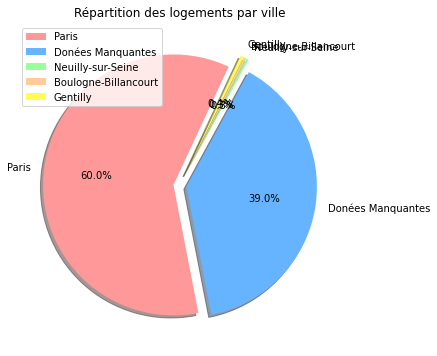

In [16]:
#Créer les graphiques!
plt.figure(figsize=(10,6))
labels = ['Paris', 'Donées Manquantes', 'Neuilly-sur-Seine', 'Boulogne-Billancourt', 'Gentilly']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [64.04, 41.63, 0.32, 0.32, 0.42]
# facteur de mutipication 60*1.06744186 = 64.04
explode = (0.05,0.05,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition des logements par ville')
plt.legend()
plt.show()

Nous constatons que **Paris, Ile-de-France, France** represente 60% des villes ou les logements airbnb sont les plus sollicités.
Donc il faudrait investir à **Paris, Ile-de-France, France**

In [17]:
df_list['neighbourhood_cleansed'].unique()

array(['Entrepôt', 'Observatoire', 'Temple', 'Hôtel-de-Ville', 'Opéra',
       'Louvre', 'Popincourt', 'Buttes-Montmartre', 'Élysée', 'Panthéon',
       'Gobelins', 'Luxembourg', 'Buttes-Chaumont', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Passy'], dtype=object)

In [18]:
df_list['neighbourhood_cleansed'].nunique()

20

In [19]:
# Répartition des logements par quartier!
df_list['neighbourhood_cleansed'].value_counts(dropna = False, normalize = True).head()

Buttes-Montmartre      0.111671
Popincourt             0.096394
Vaugirard              0.074685
Entrepôt               0.071469
Batignolles-Monceau    0.066933
Name: neighbourhood_cleansed, dtype: float64

<AxesSubplot:>

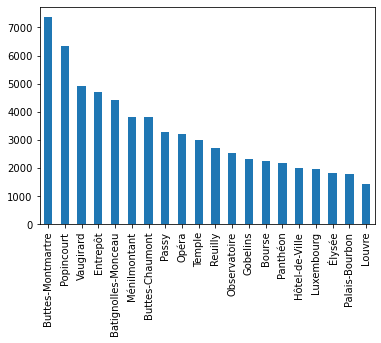

In [20]:
df_list['neighbourhood_cleansed'].value_counts().plot.bar()

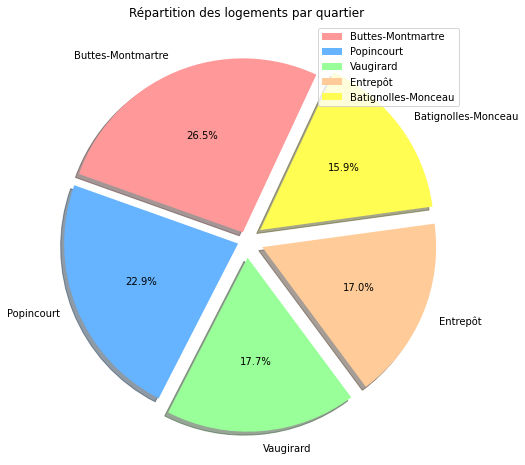

In [21]:
#Créer les graphiques!
plt.figure(figsize=(10,8))
labels = ['Buttes-Montmartre', 'Popincourt', 'Vaugirard', 'Entrepôt', 'Batignolles-Monceau']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [28.28, 24.44, 18.89, 18.14, 16.97]
#area = [91.93, 6.88, 0.82, 0.28,0.056] facteur de mutipication 26.5*1.06744186 = 28.28
explode = (0.05,0.05,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition des logements par quartier')
plt.legend()
plt.show()

Nous constatons que **Buttes-Montmartre** represente 26.5% des quartiers ou les logements airbnb sont les plus sollicités.
Donc il faudrait investir à **Buttes-Montmartre**

In [22]:
df_list['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [23]:
# Répartition des type de bien!
df_list['room_type'].value_counts(dropna = False, normalize = True).head()

Entire home/apt    0.858549
Private room       0.113961
Hotel room         0.021133
Shared room        0.006356
Name: room_type, dtype: float64

<AxesSubplot:>

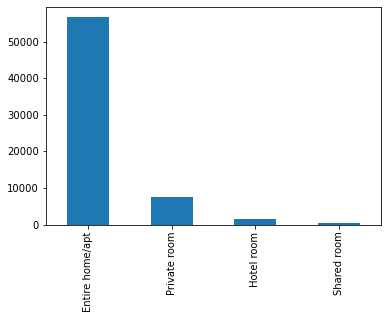

In [24]:
df_list['room_type'].value_counts().plot.bar()

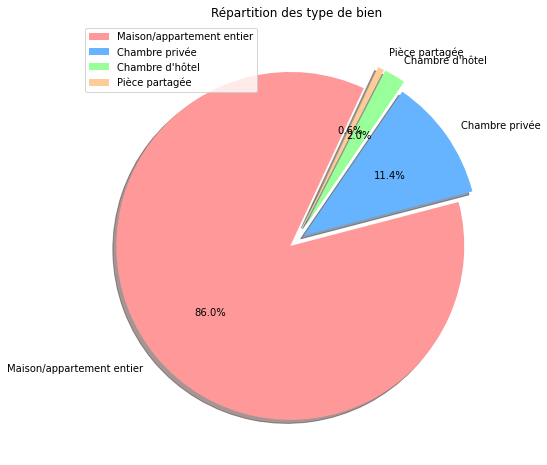

In [25]:
#Créer les graphiques!
plt.figure(figsize=(10,8))
labels = ['Maison/appartement entier', 'Chambre privée', "Chambre d'hôtel", 'Pièce partagée']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = [91.8, 12.16, 2.13, 0.64]
#facteur de mutipication 86*1.06744186 = 91.8
explode = (0.05,0.05,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition des type de bien')
plt.legend()
plt.show()

Nous constatons que **Maison/appartement entier** represente 86% des type de bien les plus sollicités. Donc il faudrait investir dans des **Maison/appartement entier**

Il faut eviter les **Pièce partagée** car elles representent 0.64% des type de bien sollicités sur airbnb

In [26]:
#Exemples de types de bien à acheter
print(df_list[df_list.room_type == 'Entire home/apt']['property_type'].head())
print('\n')

print(df_list[df_list.room_type == 'Entire home/apt']['property_type'].value_counts(dropna = False, normalize = True).head())

0         Entire loft
1    Entire apartment
2    Entire apartment
3    Entire apartment
4    Entire apartment
Name: property_type, dtype: object


Entire apartment             0.932288
Entire condominium           0.031771
Entire loft                  0.019737
Entire house                 0.006220
Entire serviced apartment    0.003022
Name: property_type, dtype: float64


In [27]:
#Exemples de types de bien à éviter
print(df_list[df_list.room_type == 'Shared room']['property_type'].head())
print('\n')

print(df_list[df_list.room_type == 'Shared room']['property_type'].value_counts(dropna = False, normalize = True).head())

414     Shared room in apartment
818     Shared room in apartment
1460    Shared room in apartment
1617    Shared room in apartment
1909    Shared room in apartment
Name: property_type, dtype: object


Shared room in apartment            0.699284
Shared room in hostel               0.126492
Shared room in condominium          0.064439
Shared room in bed and breakfast    0.062053
Shared room in loft                 0.016706
Name: property_type, dtype: float64


<AxesSubplot:>

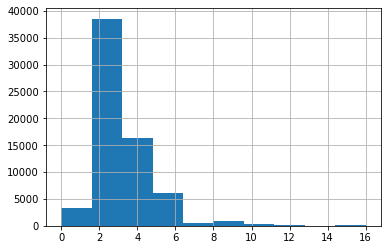

In [28]:
#-	Distribution du nombre de personne par location airbnb
df_list["accommodates"].hist()

In [29]:
df_list["accommodates"].unique()

array([ 4,  2,  3,  6,  5,  1,  7,  8,  9, 10, 14, 12, 11, 16, 15, 13,  0],
      dtype=int64)

In [30]:
df_list["accommodates"].value_counts(dropna = False, normalize = True).head()

2    0.488812
4    0.246841
3    0.095635
6    0.054205
1    0.048758
Name: accommodates, dtype: float64

In [31]:
#df_list[['room_type','property_type']].tail()

In [32]:
# Répartition des type de bien! 
df_list['property_type'].value_counts(dropna = False, normalize = True).head()

Entire apartment             0.800416
Private room in apartment    0.085122
Entire condominium           0.027277
Room in boutique hotel       0.026230
Entire loft                  0.016946
Name: property_type, dtype: float64

In [33]:
df_list['price'] = df_list['price'].str.replace('$','')
df_list['price'] = df_list['price'].str.replace(',','').astype('float64')

In [34]:

df_list[(df_list.accommodates == 2) & (df_list.last_scraped < '2020-12-31')].price.mean() ###


83.05139350180505

In [35]:
df_list[(df_list.accommodates == 2) & (df_list.last_scraped > '2020-12-31')].price.mean() #Prix moyen d’une location airbnb pour deux personnes sur l’année 2021

84.84210526315789

Le Prix moyen d’une location airbnb pour deux personnes sur l’année 2021 est de **84.84€**

In [36]:
#df_list.to_csv('airbnb_liste' ,index=False)

In [37]:
df_list = pd.read_csv('airbnb_liste')
df_list

,id,last_scraped,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights
0,2577,2020-12-16,Loft for 4 by Canal Saint Martin,NaN,NaN,Entrepôt,48.86993,2.36251,Entire loft,Entire home/apt,4,2.0,2.0,125.0,3,1125
1,3109,2020-12-17,zen and calm,Good restaurants<br />very close the Montparna...,"Paris, Ile-de-France, France",Observatoire,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1.0,60.0,2,30
2,4890,2020-12-16,Quiet Historic & Cute +Free Cruise,"Called ""Paris Next Great Neighborhood"" from Tr...","Paris, Ile-de-France, France",Temple,48.86409,2.35651,Entire apartment,Entire home/apt,4,1.0,2.0,69.0,5,120
3,5396,2020-12-16,Explore the heart of old Paris,"You are within walking distance to the Louvre,...","Paris, Ile-de-France, France",Hôtel-de-Ville,48.85207,2.35871,Entire apartment,Entire home/apt,2,NaN,1.0,62.0,1,1125
4,7397,2020-12-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,NaN,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire apartment,Entire home/apt,4,2.0,2.0,53.0,15,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65912,47021162,2020-12-16,JUNIOR SUITE 2 A 3 PERSONNES,L'hôtel Golden Tulip Washington Opera était au...,"Paris, Ile-de-France, France",Louvre,48.86594,2.33800,Room in hotel,Private room,2,1.0,1.0,176.0,1,15
65913,47024721,2020-12-15,"""La Sorbonne"" Amazing Loft (841)",The Latin Quarter is surely one of the most po...,"Paris, Ile-de-France, France",Panthéon,48.84766,2.34761,Entire apartment,Entire home/apt,4,1.0,2.0,1179.0,1,1125
65914,47024723,2020-12-15,"""La Sorbonne"" Amazing Loft (841)",The Latin Quarter is surely one of the most po...,"Paris, Ile-de-France, France",Panthéon,48.84710,2.34751,Entire apartment,Entire home/apt,4,1.0,2.0,1179.0,1,1125
65915,47025787,2020-12-16,Chambre privée dans le salon à Paris 75019.,NaN,NaN,Buttes-Chaumont,48.89255,2.37625,Private room in apartment,Private room,1,1.0,0.0,24.0,1,365


In [38]:
#Vérifier le taux des données manquantes dans la base brutes
df_list.isnull().sum()/len(df_list)*100

id                         0.000000
last_scraped               0.000000
name                       0.097092
neighborhood_overview     39.847080
neighbourhood             39.847080
neighbourhood_cleansed     0.000000
latitude                   0.000000
longitude                  0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bedrooms                  20.619870
beds                       0.910236
price                      0.000000
minimum_nights             0.000000
maximum_nights             0.000000
dtype: float64

In [39]:
#pip install folium

In [40]:
import folium


m = folium.Map(location=[48.83349, 2.31852], zoom_start=13)

In [41]:
m

In [42]:
#m = folium.Map(location=[[48.83349 ,48.86409], [2.35651, 2.31852]], zoom_start=13)

In [43]:
import folium

# Création d'une carte
fmap = folium.Map(location=[48.83349, 2.31852], tiles='OpenStreetMap', zoom_start=11)

# Ajout d'un marqueur
folium.Marker([48.83349, 2.31852],
              popup='VIA University College',
              icon=folium.Icon(color='green')).add_to(fmap)


# Ajout d'une ligne brisée définie à partir de 5 points
points = [
  (48.86409, 2.35651),
  (48.85207, 2.35871),
  (48.86227, 2.37134),
  (48.88902, 2.34656),
  (48.83349, 2.31852)
]

folium.PolyLine(points, color='blue', weight=2.5, opacity=0.8).add_to(fmap)

# Génération du fichier HTML contenant la carte
fmap.save('via.html')
fmap

In [44]:
df_paris = df_list[df_list.neighbourhood == "Paris, Ile-de-France, France"] #### biens vendus sur la ville de Paris métropolitaine
df_paris.head()

,id,last_scraped,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights
1,3109,2020-12-17,zen and calm,Good restaurants<br />very close the Montparna...,"Paris, Ile-de-France, France",Observatoire,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1.0,60.0,2,30
2,4890,2020-12-16,Quiet Historic & Cute +Free Cruise,"Called ""Paris Next Great Neighborhood"" from Tr...","Paris, Ile-de-France, France",Temple,48.86409,2.35651,Entire apartment,Entire home/apt,4,1.0,2.0,69.0,5,120
3,5396,2020-12-16,Explore the heart of old Paris,"You are within walking distance to the Louvre,...","Paris, Ile-de-France, France",Hôtel-de-Ville,48.85207,2.35871,Entire apartment,Entire home/apt,2,NaN,1.0,62.0,1,1125
7,9952,2020-12-16,Paris petit coin douillet,"Vibrant neighborhood, full of bars, cafés, fre...","Paris, Ile-de-France, France",Popincourt,48.86227,2.37134,Entire apartment,Entire home/apt,2,1.0,1.0,75.0,5,120
8,10586,2020-12-16,Montmartre Studio 7,"Montmartre, the neighborhood surrounding the s...","Paris, Ile-de-France, France",Buttes-Montmartre,48.88902,2.34656,Entire apartment,Entire home/apt,4,NaN,2.0,80.0,30,300


In [45]:
#df_paris['latitude'].astype(int)

In [46]:
#df_paris['longitude'].astype(int)

In [47]:
#lat = df_paris['latitude']

In [48]:
#df_list['latitude'].astype(str)

In [49]:
#df_list['longitude'].astype(str)

In [50]:
#df_list['position'] = df_list[['latitude', 'longitude']].apply(' '.join, axis=1)

In [51]:
#df_list['longitude']

In [52]:
#long = df_paris['longitude']

In [53]:
df_list[df_list['accommodates']==2].price.mean()

83.54182489680643

In [54]:
df_list['price']

0         125.0
1          60.0
2          69.0
3          62.0
4          53.0
          ...  
65912     176.0
65913    1179.0
65914    1179.0
65915      24.0
65916     110.0
Name: price, Length: 65917, dtype: float64

In [55]:
df_list['neighbourhood_cleansed'].unique()

array(['Entrepôt', 'Observatoire', 'Temple', 'Hôtel-de-Ville', 'Opéra',
       'Louvre', 'Popincourt', 'Buttes-Montmartre', 'Élysée', 'Panthéon',
       'Gobelins', 'Luxembourg', 'Buttes-Chaumont', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Passy'], dtype=object)

In [56]:
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Temple')].price.mean())
print('\n')
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Popincourt')].price.mean())
print('\n')
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Entrepôt')].price.mean())
print('\n')
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Buttes-Montmartre')].price.mean())
print('\n')
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Gobelins')].price.mean())
print('\n')
print(df_list[(df_list.accommodates == 2) & (df_list.neighbourhood_cleansed == 'Luxembourg')].price.mean())


100.58180484225971


72.63331371394938


74.73808519611978


71.1424280350438


66.27248201438849


114.82799145299145


In [57]:
#Le Prix moyen pour un listing de 2 personnes par quartier
listing_d = df_list[df_list['accommodates']==2]
listing_d[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False)

,price
neighbourhood_cleansed,
Élysée,146.272109
Louvre,126.978788
Palais-Bourbon,125.525761
Luxembourg,114.827991
Passy,108.651654
Hôtel-de-Ville,103.149946
Temple,100.581805
Opéra,96.518957
Bourse,93.755996


**Le Prix moyen pour un listing de 2 personnes par quartier**

In [58]:
df_list.dropna()

,id,last_scraped,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights
2,4890,2020-12-16,Quiet Historic & Cute +Free Cruise,"Called ""Paris Next Great Neighborhood"" from Tr...","Paris, Ile-de-France, France",Temple,48.86409,2.35651,Entire apartment,Entire home/apt,4,1.0,2.0,69.0,5,120
7,9952,2020-12-16,Paris petit coin douillet,"Vibrant neighborhood, full of bars, cafés, fre...","Paris, Ile-de-France, France",Popincourt,48.86227,2.37134,Entire apartment,Entire home/apt,2,1.0,1.0,75.0,5,120
12,11213,2020-12-17,DOWNTOWN PARIS,"Nous sommes dans le quartier de Belleville, en...","Paris, Ile-de-France, France",Entrepôt,48.87110,2.37424,Private room in apartment,Private room,6,1.0,3.0,157.0,1,730
13,11265,2020-12-26,Elegant appartment in Montmartre,The apartment is located at the foot of charmi...,"Paris, Ile-de-France, France",Buttes-Montmartre,48.88434,2.34005,Entire apartment,Entire home/apt,2,1.0,1.0,100.0,7,90
14,11798,2020-12-31,Loft very charming in Paris,Je suis juste à côté du quartier chinois qui e...,"Paris, Ile-de-France, France",Gobelins,48.82405,2.36828,Entire loft,Entire home/apt,3,1.0,1.0,110.0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65909,47018607,2020-12-16,"2 PIECES, METRO VICTOR HUGO, CALME, REFAIT","A 2 pas du Métro Victor Hugo, des Champs Elysé...","Paris, Ile-de-France, France",Passy,48.86835,2.28864,Entire condominium,Entire home/apt,2,1.0,1.0,40.0,30,1125
65912,47021162,2020-12-16,JUNIOR SUITE 2 A 3 PERSONNES,L'hôtel Golden Tulip Washington Opera était au...,"Paris, Ile-de-France, France",Louvre,48.86594,2.33800,Room in hotel,Private room,2,1.0,1.0,176.0,1,15
65913,47024721,2020-12-15,"""La Sorbonne"" Amazing Loft (841)",The Latin Quarter is surely one of the most po...,"Paris, Ile-de-France, France",Panthéon,48.84766,2.34761,Entire apartment,Entire home/apt,4,1.0,2.0,1179.0,1,1125
65914,47024723,2020-12-15,"""La Sorbonne"" Amazing Loft (841)",The Latin Quarter is surely one of the most po...,"Paris, Ile-de-France, France",Panthéon,48.84710,2.34751,Entire apartment,Entire home/apt,4,1.0,2.0,1179.0,1,1125


In [59]:
#supprimer les données manquantes dans la base brutes
df_list = df_list.dropna(subset=['neighborhood_overview'])

In [60]:
df_list = df_list.dropna(subset=['bedrooms'])

In [61]:
df_list = df_list.dropna(subset=['name'])

In [62]:
df_list = df_list.dropna(subset=['beds'])

In [63]:
#Vérifier le taux des données manquantes dans la base brutes
df_list.isnull().sum()/len(df_list)*100

id                        0.0
last_scraped              0.0
name                      0.0
neighborhood_overview     0.0
neighbourhood             0.0
neighbourhood_cleansed    0.0
latitude                  0.0
longitude                 0.0
property_type             0.0
room_type                 0.0
accommodates              0.0
bedrooms                  0.0
beds                      0.0
price                     0.0
minimum_nights            0.0
maximum_nights            0.0
dtype: float64

In [65]:
paris_listings = df_list[(df_list.accommodates ==2) & (df_list.neighbourhood == 'Paris, Ile-de-France, France')]

In [66]:
paris_listings.to_csv('airbnb_paris' ,index=False)
paris_listings = pd.read_csv('airbnb_list')
paris_listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_url,neighbourhood,neighbourhood_cleansed,latitude,longitude,...,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,reviews_per_month
0,2577,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://www.airbnb.com/users/show/2827,NaN,Entrepôt,48.86993,2.36251,...,4,2 baths,2.0,2.0,"[""Dryer"", ""Host greets you"", ""Hot water"", ""Han...",$125.00,3,1125,t,0.04
1,3109,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://www.airbnb.com/users/show/3631,"Paris, Ile-de-France, France",Observatoire,48.83349,2.31852,...,2,1 bath,NaN,1.0,"[""Children\u2019s books and toys"", ""Paid parki...",$60.00,2,30,t,0.19
2,4890,2020-12-16,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://www.airbnb.com/users/show/6792,"Paris, Ile-de-France, France",Temple,48.86409,2.35651,...,4,1 bath,1.0,2.0,"[""Dryer"", ""Host greets you"", ""Hangers"", ""Iron""...",$69.00,5,120,t,0.21
3,5396,2020-12-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://www.airbnb.com/users/show/7903,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85207,2.35871,...,2,1 bath,NaN,1.0,"[""Oven"", ""Fire extinguisher"", ""Host greets you...",$62.00,1,1125,t,1.65
4,7397,2020-12-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://www.airbnb.com/users/show/2626,NaN,Hôtel-de-Ville,48.85758,2.35275,...,4,1 bath,2.0,2.0,"[""Oven"", ""Paid parking off premises"", ""Hangers...",$53.00,15,130,t,2.28


In [ ]:
df_cal = pd.read_csv('calendar.csv')
df_cal.head()

In [ ]:
df_cal.rename(columns={'listing_id': 'id'}, inplace=True)
df_cal.head()

In [ ]:
pd.merge(df_list,df_cal,how='inner',on='id')

In [ ]:
#df_cal = df_cal.drop(['available', 'adjusted_price'], axis= 1)

In [ ]:
#df_ida = df_list[df_list.id == 4890] #### biens vendus sur la ville de Paris métro
#df_ida

In [ ]:
#df_idb = df_cal[df_cal.id == 4890] #### biens vendus sur la ville de Paris métro
#df_idb

In [ ]:
#df_cal['price'] = df_cal['price'].str.replace('$','')

In [ ]:
#df_cal['price'] = df_cal['price'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#df_cal.to_csv('airbnb_list' ,index=False)

In [ ]:
#df_cal = pd.read_csv('airbnb_list')
#df_cal

In [ ]:
# Répartition de la nature de mutation du bien!
#df_final['Nature mutation'].value_counts(dropna = False, normalize = True).head()